In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

#### CDF and Quantile functions

In [2]:
# Binomial distribution
# Out of 12 months what is the probability that Bitcoin goes up in 5 months if the monthly probability of going up is 0.5?
print(stats.binom.pmf(5,n=12,p=0.5))
# stats
print(stats.binom.mean(12, 0.5))
print(stats.binom.std(12, 0.5))
print(stats.binom.var(12, 0.5))

0.19335937500000003
6.0
1.7320508075688772
3.0


In [3]:
# Normal distribution
print(stats.norm.pdf(0, loc = 0, scale = 1))
print(stats.norm.cdf(0, loc = 0, scale = 1))
# scipy: loc= mean & scale= standard deviatio
# Values on the vertical axis of the PDF graph don't represent probabilities directly but rather probability densities
# 0 is the mid point of standard normal distribution, probability= 0.5

# Quantile function
print(stats.norm.ppf(0.5, loc = 0, scale = 1))
# It is the opposoite of a CDF, gives the value corresponding to an input probability
# ppf is percent point function which is the quantile function in Scipy

# generating random numbers
print(stats.norm.rvs(loc = 0, scale = 1, size = (2,3)))
# rvs samples/simulates numbers that follow a particular distribution; Normal distribution in this case.
# Sampled a 2*3 array with values from a standard normal distribution.

0.3989422804014327
0.5
0.0
[[ 0.08127546 -0.25686118  0.24567073]
 [ 0.29300755  0.13348111 -0.25064216]]


Students t-distribution is similar to a normal distribution but with thicker tails.
t distributions refer to a family of distributions defined by a parameter called the degrees of freedom (df).
Degree of freedom tells how thick the tails are of the distribtution.
Tails are thicker means extreme values are more likely.
Increaseing the degrees of freedom, the t-distribution converges to a normal distribution.
t-distribution with df=1 has a much higher likelihood of the random variable to fall on extreme values

What does it mean for a random variable to follow a distribution? If you *sample* from that distribution and plot a histogram of the samples, the shape of the histogram will resemble the pdf with large enough samples. Let's compare samples drawn from a standard normal distribution with samples drawn from a $t_5$ distribution.

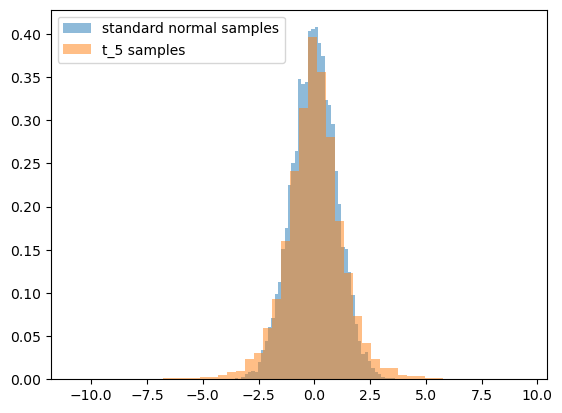

In [4]:
x = stats.norm.rvs(size = 10000)
y = stats.t.rvs(df = 5, size = 10000)
plt.hist(x, bins = 50, alpha = 0.5, label = 'standard normal samples', density = True)
plt.hist(y, bins = 50, alpha = 0.5, label = 't_5 samples', density = True)
plt.legend()
# t_5 sample is a t-distrbution sampled with 5 degrees of freedom
# While plotting double histograms, set alpha values for transparancy; 0.5 is 50% transparency
# density= True normalizes both the histograms; it rearranges the Y-axis to make comparisons easier.

In [5]:
stats.norm.stats(moments='mvsk')
# mvsk gives the mean, variance, skewness, kurtosis
# 0 kurtosis is actually the excess kurtosis (subtract 3 from the actual kurtosis)
# Anytime we use kurtosis is to compare with a normal distribution (which has kurtosis=3)

(array(0.), array(1.), array(0.), array(0.))

Here's what a chi-square distribution looks like with increasing degrees of freedom

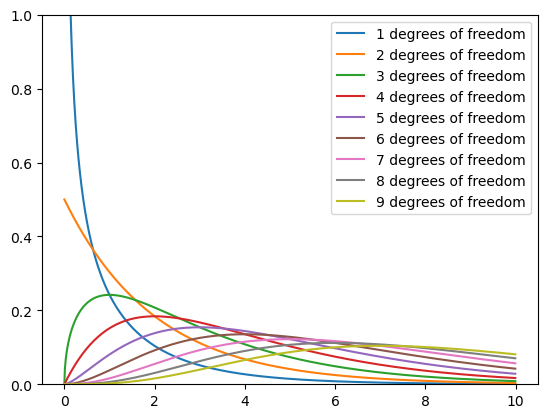

In [6]:
x = np.arange(0, 10, 0.01)
for k in range(1,10):
    plt.plot(x, stats.chi2.pdf(x, df = k), label = '%d degrees of freedom' %k)
plt.ylim((0, 1))
plt.legend()

You can create a random variable $T$ having a $t$-distribution with $n$ degrees of freedom. We need two other random variables for this:
- $Z \sim N(0,1)$
- $X \sim \Chi^2_n$
Then, $T = \frac{Z}{\sqrt{X/n}}$. Let's verify this computationally.

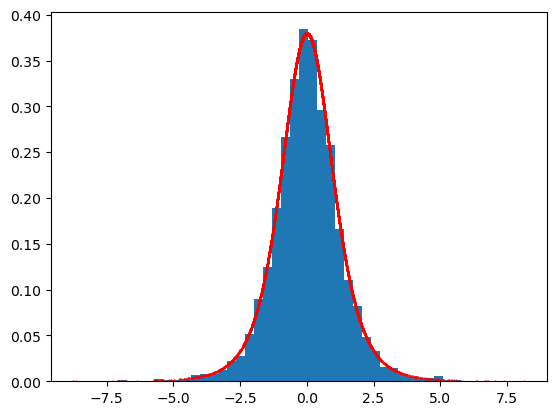

In [7]:
n = 5
z = stats.norm.rvs(size = 10000)
x = stats.chi2.rvs(df = n, size = 10000)
t = z / np.sqrt(x/n)
plt.hist(t, bins = 50, density=True)
plt.scatter(t, stats.t.pdf(t, df = n), s = 0.2, color='red')

As you can see above, the histogram of our constructed variable lines up perfectly with the pdf of a $t$-distribution.

To inspect the pdf of an $F$ distribution, we need to specify the numerator and denominator degrees of freedom.

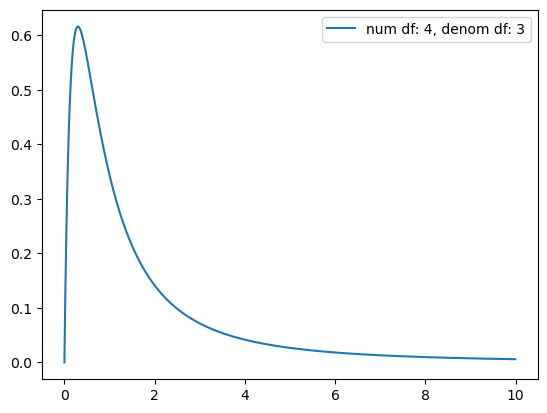

In [8]:
k1 = 4; k2 = 3
x = np.arange(0, 10, 0.01)
plt.plot(x, stats.f.pdf(x, dfn = k1, dfd = k2), label = 'num df: %d, denom df: %d'%(k1, k2))
plt.legend()

#### Demonstrating LLN
Suppose $X_1, X_2, X_3, \ldots$ are Bernoulli random variables with $P[X_i = 1] = 0.5$. Let's construct three new random variables as follows:
$$Y_1 = \frac{X_1 + X_2 + \cdots + X_{10}}{10}$$
$$Y_2 = \frac{X_1 + X_2 + \cdots + X_{50}}{50}$$
$$Y_3 = \frac{X_1 + X_2 + \cdots + X_{500}}{500}$$
What do the distributions of $Y_1$, $Y_2$ and $Y_3$ look like? For each of these, we will perform 1000 simulations, giving us 1000 possible values for each of $Y_1$, $Y_2$, and $Y_3$. Then, we'll plot a histogram of these values and compare.

Simulating random variables from the Bernoulli Distribution using stats.bernoulli.rvs

p=0.5 is an arbitrary chosen probability for the bernoulli RV=1

y1,y2,y3 are 3 sample means of the simulated random variables with size n=10,50,and 500 respectively

If we keep running the code below, the sample means' output would be random numbers between 0 and 1 which is the range of the sample mean of a Bernoulli Distribution.
Say, with a sample of size of 10 and p=0.5, all random variables X1,X2,....,X10 =1, the sample mean would be Sum of RV's X1+X2+...+X10=10 divided by sample size of 10 = 1

In [9]:
y1= stats.bernoulli.rvs(p = 0.5, size = 10).mean()
y2= stats.bernoulli.rvs(p = 0.5, size = 50).mean()
y3= stats.bernoulli.rvs(p = 0.5, size = 500).mean()
print(y1,y2,y3)

0.7 0.48 0.508


To generate a bunch of sample means we use list comprehension, which works like a for loop.
for _ in range(1000) will give 10000 iterations of y1,y2,and y3 in an array.


In [10]:
sample_y1 = [stats.bernoulli.rvs(p = 0.5, size = 10).mean() for _ in range(10000)]
sample_y2 = [stats.bernoulli.rvs(p = 0.5, size = 50).mean() for _ in range(10000)]
sample_y3 = [stats.bernoulli.rvs(p = 0.5, size = 500).mean() for _ in range(10000)]

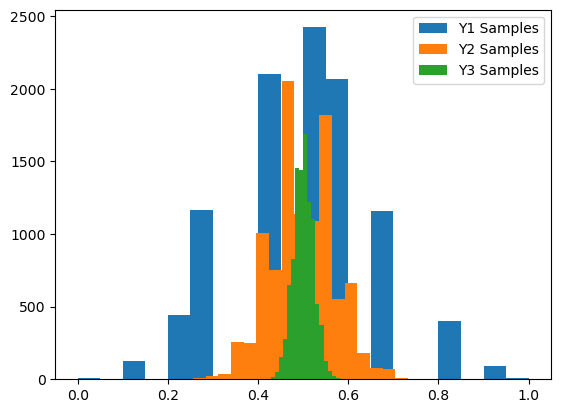

In [11]:
plt.hist(sample_y1, bins = 20, label = 'Y1 Samples')
plt.hist(sample_y2, bins = 20, label = 'Y2 Samples')
plt.hist(sample_y3, bins = 20, label = 'Y3 Samples')
plt.legend()

Superimposing the distributions of the sample means:

As we increase the sample size, the histogram becomes narrower, demonstrating the Law of Large Numbers.

The potential values of the sample means converge to 0.5 (Variance of the distribution tends to 0) because for a Bernoulli Distribution, the population mean Mu=0.5

Demonstrating LLM with a Chi-squared distribution with degrees of freedom df=5:

For a Chi-squared distribution the expected values is just the number of degrees of freedom.

As we increase sample size, the distribution converges to an expected value of 5 which is the degrees of freedom we chose for our chi-squared distribution.

In [12]:
sample_y1 = [stats.chi2.rvs(df = 5, size = 10).mean() for _ in range(10000)]
sample_y2 = [stats.chi2.rvs(df = 5, size = 50).mean() for _ in range(10000)]
sample_y3 = [stats.chi2.rvs(df = 5, size = 500).mean() for _ in range(10000)]

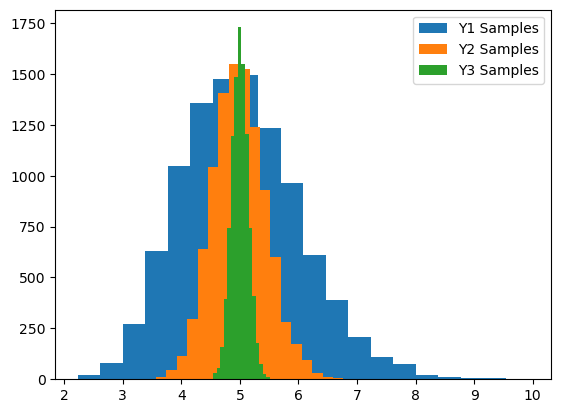

In [13]:
plt.hist(sample_y1, bins = 20, label = 'Y1 Samples')
plt.hist(sample_y2, bins = 20, label = 'Y2 Samples')
plt.hist(sample_y3, bins = 20, label = 'Y3 Samples')
plt.legend()

Application: If $X$ follows a chi-squared distribution with $n$ degrees of freedom, then as $n$ gets large, the ratio $X/n$ starts to concentrate around 1. Here's what that looks like:

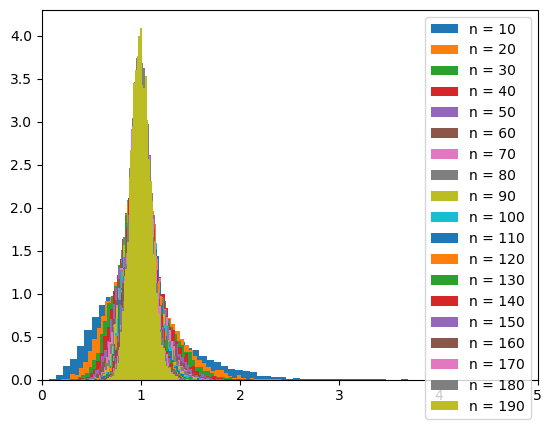

In [14]:
for n in range(10, 200, 10):
    x = stats.chi2.rvs(df = n, size = 10000)
    plt.hist(x/n, bins = 50, label = 'n = %d'%n, density = True)
plt.xlim((0,5))
plt.legend()

The loop starts by setting the degrees of freedom = 10 and goes to 190 (skips the last one, since 0 indexing in python) in steps of 10. To inculde 200 put a 201 so the n-1 index goes to 200 in steps of 10.

Simulating 10000 random variables drawn from a chi-squared distribution with increasing degrees of freedom

label = 'n = %d'%n: includes the values of variable n in the legend
Inside a string, the % sign is a formatting placeholder
%d'%n: value of variable n is going to be substiduted for %d 

xlim limits the x-axis between 0 and 5 to scale

With increasing degrees of freedom we can see the histogram gets narrower as X/n coverges to 1.

#### Sample Statistics
Let's generate some random data from a normal distribution to demonstrate the calculation of sample statistics.

$X_1, X_2, \ldots, X_n \sim N(0,1)$, where you can think of $n$ as the sample size.

In [15]:
n = 1000
x = stats.norm.rvs(size = n)

Numpy has built-in methods available for arrays for calculating mean and variance.

In [16]:
# sample mean
print(f'Sample mean = {x.mean()}')
print(f'Sample variance = {x.var()}')

Sample mean = 0.04743997386094618
Sample variance = 0.954382269976742


Compare these to the mean of the corresponding distribution from which the sample is drawn, which is $0$, and the variance, which is $1$. For skewness and kurtosis, we need to use functions from scipy.stats.

In [17]:
print(f'Sample skewness = {stats.skew(x)}')
print(f'Sample kurtosis = {stats.kurtosis(x)}')

Sample skewness = 0.02108824713814081
Sample kurtosis = 0.08478199620023918


The skewness of the distribution is $0$. The kurtosis value displayed above is the excess kurtosis, which is $0$ for the distribution. For standard deviation (volatility), we can use a Numpy method.

In [18]:
print(f'Sample standard deviation = {x.std()}')

Sample standard deviation = 0.9769249049833575


To demonstrate bivariate sample statistics, we need another random sample. Let's draw this too from a standard normal distribution.

$Y_1, Y_2, \ldots, Y_n \sim N(0,1)$

In [19]:
y = stats.norm.rvs(size = n)

The *cov()* function in Numpy yields a covariance matrix.

In [20]:
np.cov(x,y)

array([[0.95533761, 0.03670002],
       [0.03670002, 0.93727299]])

You can extract the covariance value from the matrix:

In [21]:
print(f'Sample covariance = {np.cov(x,y)[0,1]}')

Sample covariance = 0.036700024564790164


For the sample correlation, we use the *corrcoef()* function from Numpy.

In [22]:
print(f'Sample correlation = {np.corrcoef(x,y)[0,1]}')

Sample correlation = 0.038784202670738434


For calculating quantiles/percentiles, we can use the *quantile()* function from Numpy.

In [23]:
# A single quantile
np.quantile(x, 0.05)

-1.541522557142351

In [24]:
# Multiple quantiles
np.quantile(x, [0.01, 0.05])

array([-2.32505671, -1.54152256])

#### Autocorrelation

Higher the frequency of data, more the possibility of observing statistically significant autocorrelation.
EMH states that prices today incorporate all the historical information. So, daily/weekly/monthly lags do not show any useful autocorrelation that can be used to create trading strategies for profit.
The HFT funds that use high power computing with data received in real time from exchanges, have algorithms with build in trading strategies that act upon autocorrelations found in every second/milli second stamped data point.

For returns: acf between returns and their lagged values are almost equal to 0 or they are too small to be statistically distinguishable from 0
For squared returns: the acf values are observed to be larger and more significant
For absolute returns values: the acf are observed to be even higher
 

For the autocorrelation function, we use the *acf()* function from statsmodels. By default, the number of lags is calculated according to the length of the data.

In [25]:
acf(x)

array([ 1.00000000e+00, -1.21671803e-02,  1.32999688e-02,  1.72176799e-02,
        2.08312245e-02,  3.81635875e-02, -5.41624737e-02, -9.24396830e-03,
        3.38030340e-02,  5.33645512e-02, -8.52922823e-03, -7.96256763e-03,
        1.59605512e-02, -2.45423909e-02, -9.15927189e-03,  2.50555986e-02,
       -2.47863561e-02, -8.62775818e-03,  1.37386486e-03, -1.31471915e-02,
        3.73866578e-02, -2.02103637e-02,  7.03215729e-02,  3.66673689e-02,
       -9.83953812e-04,  4.70835182e-03,  1.43061333e-02,  7.90160666e-03,
       -1.59723370e-02, -4.40589132e-03,  9.70133409e-02])

In [26]:
# But you can adjust the number of lags.
acf(x, nlags = 10)

array([ 1.        , -0.01216718,  0.01329997,  0.01721768,  0.02083122,
        0.03816359, -0.05416247, -0.00924397,  0.03380303,  0.05336455,
       -0.00852923])

In [35]:
# You can also include confidence intervals by providing a alpha: significance level
# alpha= 0.05 i 2.5% each side and a 95% confidence interval
acf(x, nlags = 10, alpha = 0.05)

(array([ 1.00000000e+00,  5.34075728e-03, -2.58334303e-03,  8.97478041e-03,
        -9.67999202e-04, -9.26288030e-03,  5.19940203e-03,  5.05871973e-03,
         1.28815403e-02, -9.18592213e-03,  3.55469725e-03]),
 array([[ 1.        ,  1.        ],
        [-0.01425888,  0.0249404 ],
        [-0.02218354,  0.01701686],
        [-0.01062555,  0.02857511],
        [-0.02056991,  0.01863391],
        [-0.02886481,  0.01033905],
        [-0.01440421,  0.02480301],
        [-0.01454542,  0.02466286],
        [-0.0067231 ,  0.03248618],
        [-0.02879381,  0.01042197],
        [-0.01605485,  0.02316424]]))

 See if the acf values lie within the band or the confidence interval, if they do they are insignificant.
 
 ACF of the 1st lag is -0.01216718 which is in the band or 95% confidence interval of [-0.07414668,  0.04981232]
 
 

Oftentimes it's more useful to plot the autocorrelation values. For this, we use the *plot_acf()* function from statsmodels. This also includes the 95% confidence interval by default.

If there is a pattern of significance, it might mean something.

But if the 1st, 2nd, 3rd autocorrelations are statistically insignifacnt and 0, and the 4th is not 0 and statistically significant. Check if there is a reason for this because it just might be the artifact of the data.

To remove any confirmation bias while finding a reason for the presence of a statistically signicant result , set out the hypothesis before looking at the data. Read the literature, have an informed opinion before starting the analysis. If we see the results first, we might get a biased.

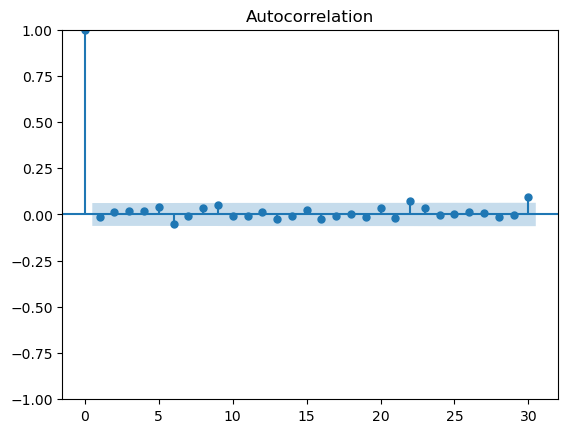

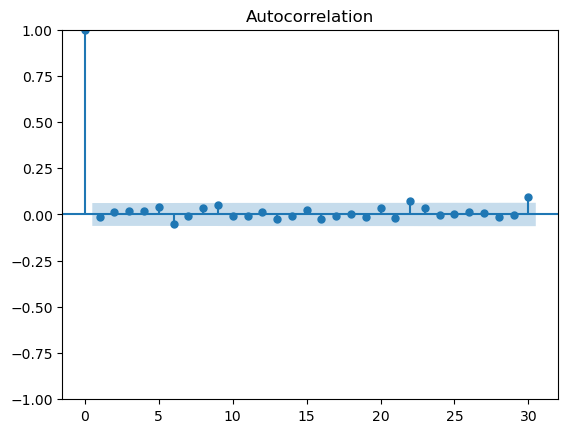

In [28]:
plot_acf(x)

Not surprisingly, we don't see any large autocorrelations because the data was randomly generated. Still, notice that one or two of the autocorrelations might turn out to be significant. This is purely by chance and you shouldn't interpret it as economically meaningful.

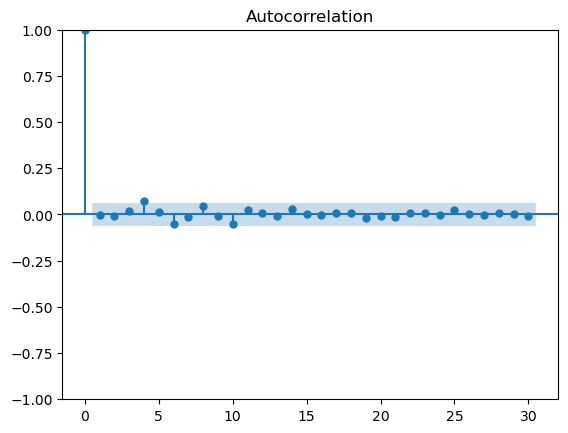

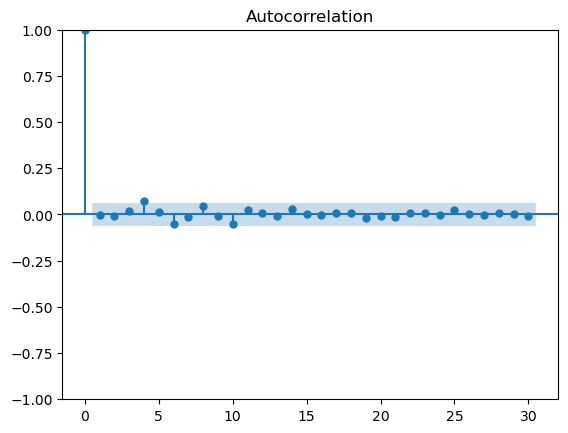

In [29]:
# acf of x^2
plot_acf(x**2)

Squared returns captures volatility clustering.

#### Variance Ratio

Returns of n time periods:
For say, n=2 time periods.
For continuously compounded returns, 
The 2 period return= rt+ rt-1

Assumptions:
Working with continuously compounded returns where multiple period returns are the sum of individual returns which are all independent of each other.
Under EMH, return (rt) is in independent of return rt-1: Var(rt+ rt-1)= Var(rt)+Var(rt-1) and there is not covariance term.
Financial time series over the short term should be stationary. The statistical properties should not change over time.
We assume that Var(rt)= var(rt-1)

Therefore, 
Variance of 2 period returns= Var(rt+ rt-1)= Var(rt)+Var(rt-1)= 2Var(rt)
Therefore, Vr(rt+ rt-1) / 2Var(rt)= 1
We can extend this to longer period returns.

Variance Ratio check for the Efficient Market Hypothesis:
If we take the variance of any “n” period return and divided it by n*individual time period return, we should get 1.

If Variance ratio = 1: there is no autocorrelation.
If Variance ratio > 1: there is +ve autocorrelation.
If Variance ratio < 1: there is -ve autocorrelation.

#### Variance Ratio for a Randomly Generated Numbers

At each time $t$, we define the 2-period return as $r_t+ r_{t-1}$

The 2 period return series is
$r_0 + r_1$, $r_2 + r_3$, $r_4 + r_5$ + ......

The Variance Ratio then is:

In [43]:
np.array([x[t] + x[t-1] for t in range(1, len(x), 2)]).var() / (2* x.var())
# 2 makes sure there is no overlap in the return series
# Values of x: 1,3,5,....
# x1+x0, x3+x2, x5+x4,....

1.0129841639518673

#### Variance Ratio for a Random Walk Model
Let's draw returns, $r$ from a standard normal distribution. These are going to be independent and identically distributed.

In [30]:
r = stats.norm.rvs(size = 1000)

The sample obviously has a variance pretty close to $1$.

In [31]:
r.var()

0.9177462960817607

At each time $t$, we can define the 2-period return as $r_t + r_{t-1}$. The 2-period return series is then:

$r_0 + r_1, r_2 + r_3, r_4 + r_5, \ldots$

The ratio of the variance of this series to the original variance is:

In [32]:
np.array([r[t] + r[t-1] for t in range(1, len(r), 2)]).var() / r.var()

1.9767360302253418

Checking the variance ratio for multiple period returns from 1 to 5:

In [33]:
for k in range(1,6):
    print(np.array([r[t-k:t+1].sum() for t in range(1, len(r), k+1)]).var() / ((k+1) * r.var()))
# when k=1: r[t-k:t+1] goes from r[t-1:t+1] where t+1 is no included since pyton loops till last-1
# r[t-k:t+1] goes from r[t-1:t] 
# The output in practice will never be exactly 1 but close to 1. This is the check for EMH.

0.9883680151126709
1.0550687620446173
0.9141408110944149
0.9610386836873439
0.9984912936186028


When increasing the number of time periods. The variance ratio will start deviating more from 1. This might lead some to belive that the EMH does not stand true. But, in reality, our sample set is decreasing which is affecting our output.

For 1000 data points,
Taking 2 period returns, we have 1000/2= a sample size of 500.
Increasing to 20 lags or 20 period returns, we are left with 1000/20, a sample size of 50.
This leads to the variance ratio to deviate from 1.